# Serverless platform scaling with rps, keda, cpu

In [89]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## Running Time 120s, spawn rate 0.04 rps, for 10 concurrent users

In [90]:
df_k8shpa = pd.read_csv("stats_df_46_120_k8s_keda_0.05.csv")
df_rps = pd.read_csv("stats_df_45_120_rps_all_keda_0.05.csv")
df_kda = pd.read_csv("stats_df_45_120_keda_keda_0.05.csv")


Text(0, 0.5, 'CDF')

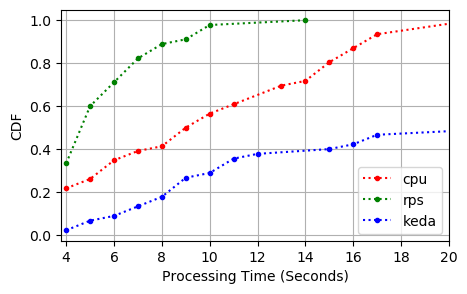

In [92]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df_k8shpa['PT'],df_k8shpa['cdf'],  linestyle='dotted', color='r', marker='.',label='cpu')
ax.plot(df_rps['PT'],df_rps['cdf'],  linestyle='dotted', color='g', marker='.',label='rps')
ax.plot(df_kda['PT'],df_kda['cdf'],  linestyle='dotted', color='b', marker='.',label='keda')
plt.xlim([3.8,20])
plt.grid()
plt.legend()
#plt.legend(loc='best')
ax.set_xlabel('Processing Time (Seconds)', fontsize=10)
ax.set_ylabel('CDF', fontsize=10)
#ax2.set_ylabel("# of Pods")

## Processing Time


In [93]:
df_k8shpa = pd.read_csv("10_120_keda_keda_0.05.csv")
df_rps = pd.read_csv("10_120_rps_all_keda_0.05.csv")
df_kda = pd.read_csv("10_120_k8s_keda_0.05.csv")

df = df_k8shpa
df['k8a_hps'] =df_k8shpa['PT'] 
df['openfaas_rps']= df_rps['PT']
df['keda']=df_kda['PT']


Text(0.5, 0, 'Scaling Approaches')

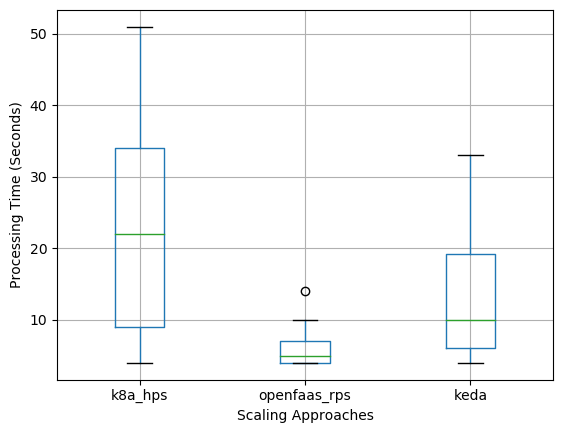

In [94]:
bx = df.boxplot(column=['k8a_hps','openfaas_rps','keda'])  
bx.set_ylabel('Processing Time (Seconds)')
bx.set_xlabel('Scaling Approaches')



In [95]:
df_results_keda = pd.read_csv("keda_results/promo_metrics45_120_keda_keda_0.05.csv")
df_results_rps = pd.read_csv("keda_results/promo_metrics45_120_rps_all_keda_0.05.csv")
df_results_cpu = pd.read_csv("keda_results/promo_metrics46_120_k8s_keda_0.05.csv")


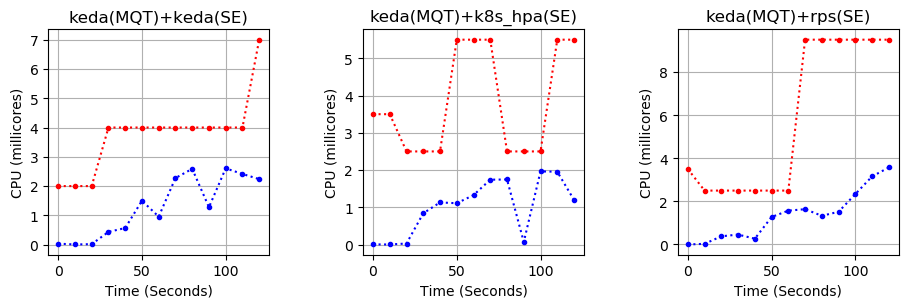

In [102]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

# creating an array of data for x-axis
x = df_results_keda['seconds'].head(13)

# data for y-axis
y_1 = df_results_keda['cpu_used'].head(13)
y_1_1 =df_results_keda['cpu_requested'].head(13)

# data for y-axis for another plot
y_2 = df_results_cpu['cpu_used'].head(13)
y_2_1 = df_results_cpu['cpu_requested'].head(13)

y_3 = df_results_rps['cpu_used']
y_3_1 = df_results_rps['cpu_requested']

# figsize() function to adjust the size
# of function
plt.subplots(figsize=(10, 4))

# using subplot function and creating
# plot one
plt.subplot(1, 3, 1)
plt.plot(x, y_1, linestyle='dotted', color='b', marker='.',label='cpu_used')
plt.plot(x, y_1_1, linestyle='dotted',  color='r', marker='.',label='cpu_requested')
plt.title('keda(MQT)+keda(SE)')
plt.xlabel('Time (Seconds)')
plt.ylabel('CPU (millicores)')
plt.grid()
# using subplot function and creating plot two
plt.subplot(1, 3, 2)
plt.plot(x, y_2, linestyle='dotted', color='b', marker='.',label='cpu_used')
plt.plot(x, y_2_1, linestyle='dotted',  color='r', marker='.',label='cpu_requested')
plt.title('keda(MQT)+k8s_hpa(SE)')
plt.xlabel('Time (Seconds)')
plt.ylabel('CPU (millicores)')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(x, y_3, linestyle='dotted', color='b', marker='.',label='cpu_used')
plt.plot(x, y_3_1, linestyle='dotted',  color='r', marker='.',label='cpu_requested')
plt.title('keda(MQT)+rps(SE)')
plt.xlabel('Time (Seconds)')
plt.ylabel('CPU (millicores)')
plt.grid()

# space between the plots
plt.tight_layout(4)

# show plot
plt.show()


Text(0, 0.5, 'CPU')

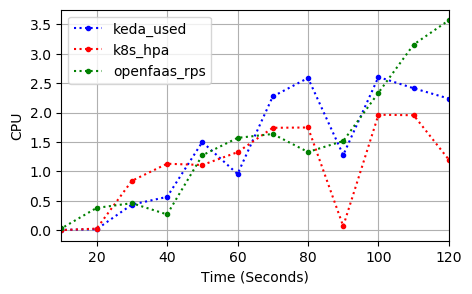

In [103]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df_results_keda['seconds'],df_results_keda['cpu_used'], linestyle='dotted', color='b', marker='.',label='keda_used')
ax.plot(df_results_cpu['seconds'],df_results_cpu['cpu_used'],linestyle='dotted',  color='r', marker='.',label='k8s_hpa')
ax.plot(df_results_rps['seconds'],df_results_rps['cpu_used'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
# ax.plot(df_results_keda['seconds'],df_results_keda['cpu_requested'], linestyle='solid', color='b')
# ax.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],linestyle='solid',  color='r')
# ax.plot(df_results_rps['seconds'],df_results_rps['cpu_requested'], linestyle='solid', color='g')
plt.xlim([10, 120])
plt.grid()
#plt.legend()
plt.legend()
ax.set_xlabel('Time (Seconds)', fontsize=10)
ax.set_ylabel('CPU', fontsize=10)

Text(0, 0.5, 'Memory')

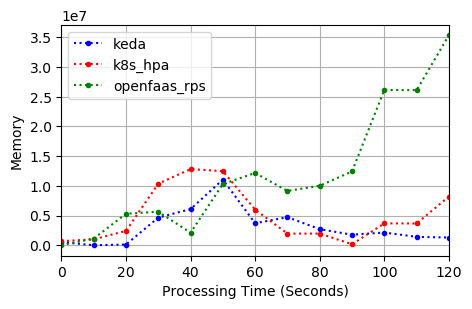

In [104]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df_results_keda['seconds'],df_results_keda['memory_used'], linestyle='dotted', color='b', marker='.',label='keda')
ax.plot(df_results_cpu['seconds'],df_results_cpu['memory_used'],linestyle='dotted',  color='r', marker='.',label='k8s_hpa')
ax.plot(df_results_rps['seconds'],df_results_rps['memory_used'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
plt.xlim([0, 120])
plt.grid()
plt.legend()
#plt.legend(loc='best')
ax.set_xlabel('Processing Time (Seconds)', fontsize=10)
ax.set_ylabel('Memory', fontsize=10)

In [105]:
df = df_results_keda
df['cpu_t'] =df_results_cpu['throughput'] 
df['rps_t']= df_results_rps['throughput']
df['mql_t']=df_results_keda['throughput']

Text(0.5, 0, 'Scaling Approaches')

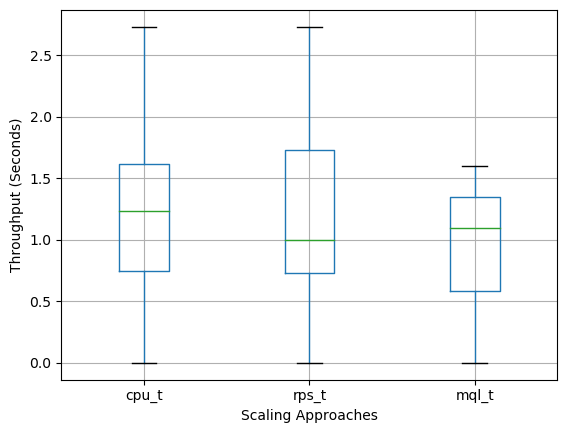

In [106]:

bx = df.boxplot(column=['cpu_t','rps_t','mql_t'])  
bx.set_ylabel('Throughput (Seconds)')
bx.set_xlabel('Scaling Approaches')


Text(0, 0.5, 'Thorughput (rps)')

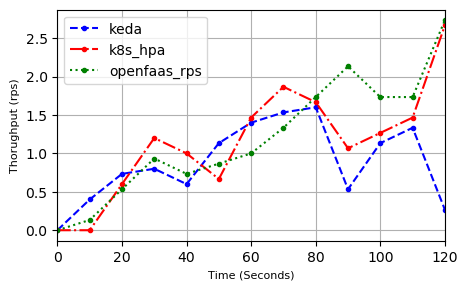

In [108]:
df_results_keda['unused']= df_results_keda['cpu_requested']-df_results_keda['cpu_used']
df_results_rps['unused']= df_results_rps['cpu_requested']-df_results_rps['cpu_used']
df_results_cpu['unused']= df_results_cpu['cpu_requested']-df_results_keda['cpu_used']
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df_results_keda['seconds'],df_results_keda['throughput'], linestyle='dashed', color='b', marker='.',label='keda')
ax.plot(df_results_cpu['seconds'],df_results_cpu['throughput'],linestyle='dashdot',  color='r', marker='.',label='k8s_hpa')
ax.plot(df_results_rps['seconds'],df_results_rps['throughput'], linestyle='dotted', color='g', marker='.',label='openfaas_rps')
#ax.plot(df_results_keda_all['seconds'],df_results_keda_all['throughput'], linestyle='dotted', color='k', marker='.',label='keda_all')
#ax.plot(df_results_keda_poll_2['seconds'],df_results_keda_poll_2['throughput'], linestyle='solid', color='k', marker='.',label='keda_all_2')

plt.xlim([0, 120])
plt.grid()
plt.legend()
#plt.legend(loc='best')
ax.set_xlabel('Time (Seconds)', fontsize=8)
ax.set_ylabel('Thorughput (rps)', fontsize=8)

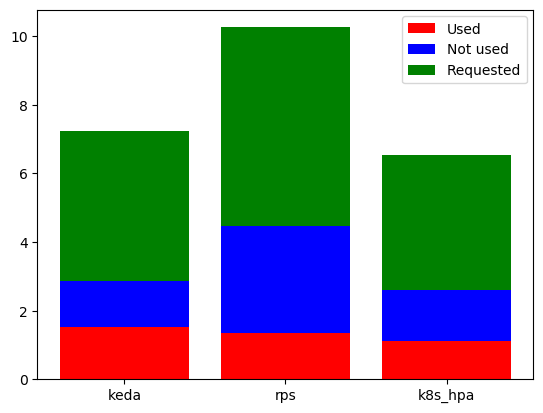

In [47]:
# importing package
import matplotlib.pyplot as plt

# create data
x = ['keda', 'rps', 'k8s_hpa']
y1 = [df_results_keda['cpu_requested'].mean(),df_results_rps['cpu_requested'].mean(),df_results_cpu['cpu_requested'].mean()]
y2 = [df_results_keda['cpu_used'].mean(),df_results_rps['cpu_used'].mean(),df_results_cpu['cpu_used'].mean()]
y3 = [df_results_keda['unused'].mean(),df_results_rps['unused'].mean(),df_results_cpu['unused'].mean()]

# plot bars in stack manner
plt.bar(x, y2, color='r',label="Used")
plt.bar(x, y3, bottom=y2, color='b',label='Not used')
plt.bar(x, y1, bottom=y3, color='g',label='Requested')
plt.legend()
plt.show()



In [55]:
df_results_keda

,cpu_used,cpu_requested,time,pod_count,memory_used,seconds,throughput,cpu_t,rps_t,mql_t,unused
0,0.033738,2,2023-01-17 19:48:15,2,5.325142e+05,0,0.000000,0.000000,0.000000,0.000000,1.966262
1,0.005282,2,2023-01-17 19:48:25,2,2.859020e+03,10,0.400000,0.000000,0.133333,0.400000,1.994718
2,0.016867,2,2023-01-17 19:48:35,2,1.167873e+05,20,0.733333,0.600000,0.533333,0.733333,1.983133
3,0.435646,4,2023-01-17 19:48:45,4,4.653976e+06,30,0.800000,1.200000,0.933333,0.800000,3.564354
4,0.566778,4,2023-01-17 19:48:55,4,6.083657e+06,40,0.600000,1.000000,0.733333,0.600000,3.433222
5,1.499933,4,2023-01-17 19:49:05,4,1.104460e+07,50,1.133333,0.666667,0.866667,1.133333,2.500067
6,0.955916,4,2023-01-17 19:49:15,5,3.701332e+06,60,1.400000,1.466667,1.000000,1.400000,3.044084
7,2.274073,4,2023-01-17 19:49:25,5,4.719979e+06,70,1.533333,1.866667,1.333333,1.533333,1.725927
8,2.588751,4,2023-01-17 19:49:35,5,2.703323e+06,80,1.600000,1.666667,1.733333,1.600000,1.411249
9,1.278891,4,2023-01-17 19:49:45,4,1.771375e+06,90,0.533333,1.066667,2.133333,0.533333,2.721109


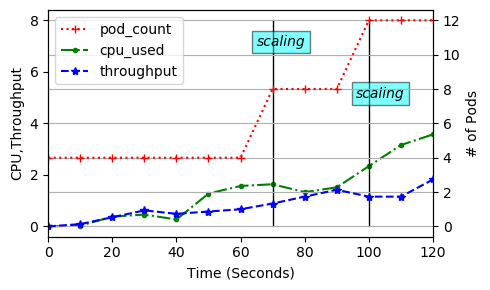

In [125]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()


p1=ax2.plot(df_results_rps['seconds'],df_results_rps['pod_count'],   linestyle='dotted', color='r', marker='+',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],   linestyle='dashdot', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_rps['seconds'],df_results_rps['throughput'],   linestyle='dashed', color='b', marker='*',label='throughput')
#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 120])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')
ax1.plot([70, 70], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([100, 100], [0, 8], 'k-', lw=1, label='scale point')

ax1.text(65, 7, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(96, 5, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})


ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")

plt.tight_layout()
plt.savefig('serverless_scaling_mq_rps.pdf')
plt.show()

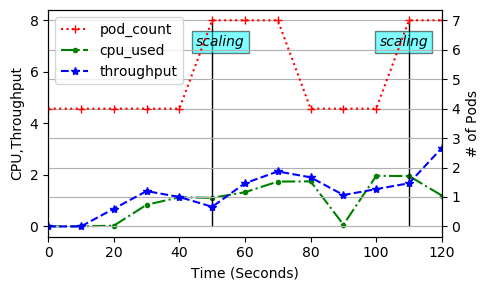

In [126]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()


p1=ax2.plot(df_results_cpu['seconds'],df_results_cpu['pod_count'],   linestyle='dotted', color='r', marker='+',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_used'],   linestyle='dashdot', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_cpu['seconds'],df_results_cpu['throughput'],   linestyle='dashed', color='b', marker='*',label='throughput')

#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 120])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')
#ax1.annotate('annotate', xy=(60, 8), xytext=(80, 6),
 #           arrowprops=dict(facecolor='black', shrink=0.001))
ax1.plot([50, 50], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([110, 110], [0, 8], 'k-', lw=1, label='scale point')

ax1.text(45, 7, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(101, 7, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")

plt.tight_layout()
plt.savefig('serverless_scaling_mq_k8s_hpa.pdf')
plt.show()


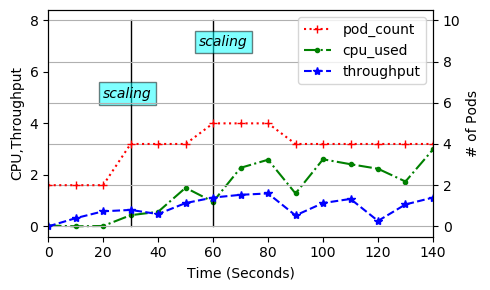

In [127]:
fig, ax1 = plt.subplots(figsize=(5, 3))
ax2 = ax1.twinx()

p1=ax2.plot(df_results_keda['seconds'],df_results_keda['pod_count'],   linestyle='dotted', color='r', marker='+',label='pod_count')
#ax1.plot(df_results_cpu['seconds'],df_results_cpu['cpu_requested'],   linestyle='solid', color='g', marker='.',label='cpu_requested')
p2=ax1.plot(df_results_keda['seconds'],df_results_keda['cpu_used'],   linestyle='dashdot', color='g', marker='.',label='cpu_used')
p3=ax2.plot(df_results_keda['seconds'],df_results_keda['throughput'],   linestyle='dashed', color='b', marker='*',label='throughput')
#ax1.plot(df_results_rps['seconds'],df_results_rps['cpu_used'],  linestyle='dashdot', color='b', marker='.',label='rps')
plt.xlim([0, 140])
plt.grid()
# ax1.legend(loc=0)
# ax2.legend(loc=0)
leg = p1 + p2+p3
labs = [l.get_label() for l in leg]
plt.legend(leg, labs, loc=0)
#ax1.legend(loc='best')

ax1.plot([30, 30], [0, 8], 'k-', lw=1, label='scale point')
ax1.plot([60, 60], [0, 8], 'k-', lw=1, label='scale point')

ax1.text(20, 5, 'scaling', style='italic',
         bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.text(55, 7, 'scaling', style='italic',
        bbox={'facecolor': 'cyan', 'alpha': 0.5, 'pad': 3})
ax1.set_xlabel('Time (Seconds)', fontsize=10)
ax1.set_ylabel('CPU,Throughput', fontsize=10)
ax2.set_ylabel("# of Pods")

plt.tight_layout()
plt.savefig('serverless_scaling_mq_keda.pdf')
plt.show()